In [281]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib.pyplot import figure
import json
import pickle

In [282]:
# Read the News sentiment csv file into a pandas DataFrame
news_df = pd.read_csv('../resources/news/Descriptive_stats_1.0.csv')
news_df.head()

,Unnamed: 0,Published,Snippet_s,Lead_Paragraph_s,Main_Headline_s,count,mean,std,min,25%,50%,75%,max
0,0,10/14/2016,0.700000,0.700000,0.400000,3,0.600000,0.173205,0.400000,0.550000,0.700000,0.700000,0.7
1,1,5/15/2017,0.200000,0.200000,-0.200000,3,0.066667,0.230940,-0.200000,0.000000,0.200000,0.200000,0.2
2,2,8/28/2017,-0.100000,-0.100000,-0.100000,3,-0.100000,0.000000,-0.100000,-0.100000,-0.100000,-0.100000,-0.1
3,3,1/1/2019,0.020000,0.020000,0.380000,3,0.140000,0.230940,0.000000,0.010000,0.020000,0.210000,0.4
4,4,1/2/2019,-0.054545,-0.054545,0.036364,3,-0.024242,0.241437,-0.218182,-0.136364,-0.054545,0.072727,0.2


In [283]:
# Create a new dataframe with only the columns needed for the Regression
clean_news_df = news_df.drop(['Unnamed: 0','count'], axis=1)
clean_news_df = clean_news_df.set_index('Published')
clean_news_df.index.names = ['date']
clean_news_df.index = pd.to_datetime(clean_news_df.index)
clean_news_df.head()

,Snippet_s,Lead_Paragraph_s,Main_Headline_s,mean,std,min,25%,50%,75%,max
date,,,,,,,,,,
2016-10-14,0.700000,0.700000,0.400000,0.600000,0.173205,0.400000,0.550000,0.700000,0.700000,0.7
2017-05-15,0.200000,0.200000,-0.200000,0.066667,0.230940,-0.200000,0.000000,0.200000,0.200000,0.2
2017-08-28,-0.100000,-0.100000,-0.100000,-0.100000,0.000000,-0.100000,-0.100000,-0.100000,-0.100000,-0.1
2019-01-01,0.020000,0.020000,0.380000,0.140000,0.230940,0.000000,0.010000,0.020000,0.210000,0.4
2019-01-02,-0.054545,-0.054545,0.036364,-0.024242,0.241437,-0.218182,-0.136364,-0.054545,0.072727,0.2


In [284]:
# Read the News sentiment csv file into a pandas DataFrame
w2v_df = pd.read_csv('../resources/news/business_news_word2vec.csv')
w2v_df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,2016-10-14T04:00:00+0000,-0.042708,0.029647,-0.019681,0.009444,-0.030000,-0.058390,0.025602,-0.037046,0.146306,...,-0.107121,-0.026034,-0.079626,0.095634,0.015284,0.013509,0.064372,0.004792,0.014158,-0.071216
1,2017-05-15T07:21:08+0000,0.028475,0.095679,0.023912,0.081352,-0.035714,-0.142033,-0.019288,-0.052985,0.143840,...,-0.146977,0.012309,-0.083553,-0.017334,0.005087,0.021395,-0.095197,0.040135,0.063836,-0.102547
2,2017-08-28T16:33:11+0000,-0.002913,0.007083,-0.019647,0.050519,-0.048486,-0.015724,0.035422,-0.023903,0.077841,...,0.015891,0.018854,-0.063055,-0.010825,-0.048286,-0.086072,0.034598,-0.077390,0.039180,0.016693
3,2019-01-01T10:00:06+0000,-0.020165,0.114699,-0.038919,0.149319,-0.029073,-0.021098,-0.019813,-0.087023,0.072137,...,-0.100715,0.069874,-0.060326,0.026296,0.004639,0.040070,0.069238,0.006884,0.066581,-0.048204
4,2019-01-01T10:00:07+0000,0.062875,0.052707,-0.067801,0.108041,-0.057408,-0.058799,0.003148,-0.099071,0.143119,...,-0.027152,0.045913,-0.095576,0.008519,0.088440,-0.048104,-0.020682,-0.091771,-0.010306,0.050415


In [285]:
# Clean the word to vec dataframe
clean_w2v_df = w2v_df.set_index('Unnamed: 0')
clean_w2v_df.index = pd.to_datetime(clean_w2v_df.index)
clean_w2v_df.index = clean_w2v_df.index.strftime('%Y-%m-%d')
clean_w2v_df.index.names = ['date']
clean_w2v_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
date,,,,,,,,,,,,,,,,,,,,,
2016-10-14,-0.042708,0.029647,-0.019681,0.009444,-0.030000,-0.058390,0.025602,-0.037046,0.146306,0.091940,...,-0.107121,-0.026034,-0.079626,0.095634,0.015284,0.013509,0.064372,0.004792,0.014158,-0.071216
2017-05-15,0.028475,0.095679,0.023912,0.081352,-0.035714,-0.142033,-0.019288,-0.052985,0.143840,0.017806,...,-0.146977,0.012309,-0.083553,-0.017334,0.005087,0.021395,-0.095197,0.040135,0.063836,-0.102547
2017-08-28,-0.002913,0.007083,-0.019647,0.050519,-0.048486,-0.015724,0.035422,-0.023903,0.077841,0.049966,...,0.015891,0.018854,-0.063055,-0.010825,-0.048286,-0.086072,0.034598,-0.077390,0.039180,0.016693
2019-01-01,-0.020165,0.114699,-0.038919,0.149319,-0.029073,-0.021098,-0.019813,-0.087023,0.072137,0.042570,...,-0.100715,0.069874,-0.060326,0.026296,0.004639,0.040070,0.069238,0.006884,0.066581,-0.048204
2019-01-01,0.062875,0.052707,-0.067801,0.108041,-0.057408,-0.058799,0.003148,-0.099071,0.143119,0.078700,...,-0.027152,0.045913,-0.095576,0.008519,0.088440,-0.048104,-0.020682,-0.091771,-0.010306,0.050415


In [286]:
# Read the VIX history csv file into a pandas DataFrame
vix_df = pd.read_csv('../resources/vix/vix_history.csv')
vix_df.head()

,Date,VIX Open,VIX High,VIX Low,VIX Close
0,1/2/2004,17.96,18.68,17.54,18.22
1,1/5/2004,18.45,18.49,17.44,17.49
2,1/6/2004,17.66,17.67,16.19,16.73
3,1/7/2004,16.72,16.75,15.50,15.50
4,1/8/2004,15.42,15.68,15.32,15.61


In [287]:
# Create a new dataframe with only the columns needed for the Regression
clean_vix_df = vix_df.drop(['VIX Open','VIX High','VIX Low'], axis=1).set_index('Date')
clean_vix_df.index.names = ['date']
clean_vix_df.rename(columns={'VIX Close': 'vix_close'}, inplace=True)
clean_vix_df.index = pd.to_datetime(clean_vix_df.index, format="%m/%d/%Y")
clean_vix_df.head()

,vix_close
date,
2004-01-02,18.22
2004-01-05,17.49
2004-01-06,16.73
2004-01-07,15.50
2004-01-08,15.61


In [288]:
clean_vix_df = clean_vix_df.pct_change()*100
clean_vix_df.head()

,vix_close
date,
2004-01-02,NaN
2004-01-05,-4.006586
2004-01-06,-4.345340
2004-01-07,-7.352062
2004-01-08,0.709677


In [289]:
# Merge the word to vec and VIX data
merged_w2v_df=pd.merge(clean_w2v_df, clean_news_df, how='inner', left_index=True, right_index=True)
merged_w2v_df.head()

,0,1,2,3,4,5,6,7,8,9,...,Snippet_s,Lead_Paragraph_s,Main_Headline_s,mean,std,min,25%,50%,75%,max
date,,,,,,,,,,,,,,,,,,,,,
2016-10-14,-0.042708,0.029647,-0.019681,0.009444,-0.030000,-0.058390,0.025602,-0.037046,0.146306,0.091940,...,0.70,0.70,0.40,0.600000,0.173205,0.4,0.55,0.70,0.70,0.7
2017-05-15,0.028475,0.095679,0.023912,0.081352,-0.035714,-0.142033,-0.019288,-0.052985,0.143840,0.017806,...,0.20,0.20,-0.20,0.066667,0.230940,-0.2,0.00,0.20,0.20,0.2
2017-08-28,-0.002913,0.007083,-0.019647,0.050519,-0.048486,-0.015724,0.035422,-0.023903,0.077841,0.049966,...,-0.10,-0.10,-0.10,-0.100000,0.000000,-0.1,-0.10,-0.10,-0.10,-0.1
2019-01-01,-0.020165,0.114699,-0.038919,0.149319,-0.029073,-0.021098,-0.019813,-0.087023,0.072137,0.042570,...,0.02,0.02,0.38,0.140000,0.230940,0.0,0.01,0.02,0.21,0.4
2019-01-01,0.062875,0.052707,-0.067801,0.108041,-0.057408,-0.058799,0.003148,-0.099071,0.143119,0.078700,...,0.02,0.02,0.38,0.140000,0.230940,0.0,0.01,0.02,0.21,0.4


In [290]:
merged_all_df=pd.merge(merged_w2v_df,clean_vix_df, how='inner', left_index=True, right_index=True)
merged_all_df.head()

,0,1,2,3,4,5,6,7,8,9,...,Lead_Paragraph_s,Main_Headline_s,mean,std,min,25%,50%,75%,max,vix_close
date,,,,,,,,,,,,,,,,,,,,,
2016-10-14,-0.042708,0.029647,-0.019681,0.009444,-0.030000,-0.058390,0.025602,-0.037046,0.146306,0.091940,...,0.700000,0.400000,0.600000,0.173205,0.400000,0.550000,0.700000,0.700000,0.7,-3.415219
2017-05-15,0.028475,0.095679,0.023912,0.081352,-0.035714,-0.142033,-0.019288,-0.052985,0.143840,0.017806,...,0.200000,-0.200000,0.066667,0.230940,-0.200000,0.000000,0.200000,0.200000,0.2,0.192308
2017-08-28,-0.002913,0.007083,-0.019647,0.050519,-0.048486,-0.015724,0.035422,-0.023903,0.077841,0.049966,...,-0.100000,-0.100000,-0.100000,0.000000,-0.100000,-0.100000,-0.100000,-0.100000,-0.1,0.354610
2019-01-02,0.144113,0.129674,-0.027830,0.098580,-0.037144,-0.040632,0.109305,-0.168248,0.135254,0.042855,...,-0.054545,0.036364,-0.024242,0.241437,-0.218182,-0.136364,-0.054545,0.072727,0.2,-8.654603
2019-01-02,0.123807,-0.056305,-0.058940,-0.003916,-0.006215,0.061412,0.016164,-0.072978,0.083811,-0.072276,...,-0.054545,0.036364,-0.024242,0.241437,-0.218182,-0.136364,-0.054545,0.072727,0.2,-8.654603


In [291]:
# Drop rows with NaNs
merged_all_df.dropna(inplace=True)
merged_all_df.head()

,0,1,2,3,4,5,6,7,8,9,...,Lead_Paragraph_s,Main_Headline_s,mean,std,min,25%,50%,75%,max,vix_close
date,,,,,,,,,,,,,,,,,,,,,
2016-10-14,-0.042708,0.029647,-0.019681,0.009444,-0.030000,-0.058390,0.025602,-0.037046,0.146306,0.091940,...,0.700000,0.400000,0.600000,0.173205,0.400000,0.550000,0.700000,0.700000,0.7,-3.415219
2017-05-15,0.028475,0.095679,0.023912,0.081352,-0.035714,-0.142033,-0.019288,-0.052985,0.143840,0.017806,...,0.200000,-0.200000,0.066667,0.230940,-0.200000,0.000000,0.200000,0.200000,0.2,0.192308
2017-08-28,-0.002913,0.007083,-0.019647,0.050519,-0.048486,-0.015724,0.035422,-0.023903,0.077841,0.049966,...,-0.100000,-0.100000,-0.100000,0.000000,-0.100000,-0.100000,-0.100000,-0.100000,-0.1,0.354610
2019-01-02,0.144113,0.129674,-0.027830,0.098580,-0.037144,-0.040632,0.109305,-0.168248,0.135254,0.042855,...,-0.054545,0.036364,-0.024242,0.241437,-0.218182,-0.136364,-0.054545,0.072727,0.2,-8.654603
2019-01-02,0.123807,-0.056305,-0.058940,-0.003916,-0.006215,0.061412,0.016164,-0.072978,0.083811,-0.072276,...,-0.054545,0.036364,-0.024242,0.241437,-0.218182,-0.136364,-0.054545,0.072727,0.2,-8.654603


In [321]:
# Export the data
# merged_all_df.to_csv("../resources/vix/all.csv")

In [293]:
# Assign the data to X and y
x_columns = merged_all_df.columns.tolist()
del x_columns[-1]

X = merged_all_df[x_columns]
y = merged_all_df["vix_close"].values.reshape(-1, 1)
print(X.shape, y.shape)

print("Shape: ", X.shape, y.shape)

(989, 310) (989, 1)
Shape:  (989, 310) (989, 1)


In [294]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

In [295]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [296]:
# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(training_score)
print(testing_score)

0.4253678523710773
-0.8228254398610375


Text(0.5, 1.0, 'Residual Plot')

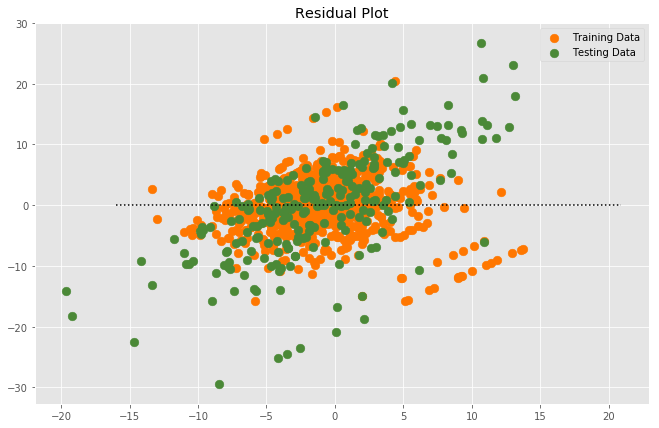

In [297]:
# Plot the Residuals for the Training and Testing data
plt.style.use('ggplot')
figure(num=None, figsize=(11, 7))
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="#FF7700", label="Training Data", marker='o',s=75)
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="#4B8937", label="Testing Data", marker='o',s=75)
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max(), colors="black",linestyles="dotted")
plt.title("Residual Plot")

In [298]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[-8.50762628e+00  3.67500291e+00  1.39330864e+01  5.24107774e+00
  -3.67569058e+00 -4.12238297e+00  2.03354001e+01  9.25342751e+00
  -1.14413643e+01 -2.47932005e+00 -1.92156884e+00 -9.35165230e+00
   1.96603829e+01  8.95017382e+00 -2.31298710e+01  1.26005643e+01
  -1.20408665e+00  1.38615649e+01  2.01822926e+00  7.73029005e+00
   2.83776089e+00  6.05618413e-01  9.08860125e-01  3.62218286e-01
  -5.43769239e+00 -7.95681590e+00  6.17664946e+00  2.81737934e+00
   1.24796160e+01  5.22258067e+00  2.84378364e+00 -7.61447115e+00
  -3.90868488e+00  2.69519893e+00  1.06160661e+01  9.21806160e+00
  -7.25811508e+00  5.03125938e+00 -1.05183677e+01  1.16512234e+01
  -1.44126406e+01  1.06217568e+01  1.26886407e+01  8.78370235e-01
  -5.57361468e+00  9.61893747e+00 -6.24064861e+00 -1.41628332e+01
   4.74774612e+00  1.37304576e+01 -3.61440327e+00  1.13216083e+01
  -6.68853979e+00 -2.37733397e+00 -6.82137070e+00 -9.83990108e+00
  -1.31575825e+01 -9.02081830e+00 -6.19555979e+00 -8.7

In [299]:
# Evaluate results
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [-3.41521869]
Predicted output: [-1.02022834]
Prediction Error: [2.39499035]


In [309]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, model.predict(X_test))

73.97755035878207

In [310]:
r2_score(y_test, model.predict(X_test))

-0.8228254398610375

In [308]:
# Get min and max values
x_min = X.min()
x_max = X.max()
y_min_actual = y.min()
y_max_actual = y.max()
y_min = 101.896225057 + 12.44002424 * x_min
y_max = 101.896225057 + 12.44002424 * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")

Actual Min Value: -15.992141453831044
Calculated Min Value: 0                   100.035081
1                   100.679228
2                    99.824001
3                   100.671266
4                    99.808208
5                    99.551355
6                   100.091799
7                    99.075555
8                   101.183262
9                   100.683419
10                   99.275909
11                   98.636388
12                   98.988187
13                  100.078349
14                   98.594721
15                  100.915237
16                  100.249989
17                  101.162087
18                  100.439462
19                   99.098174
20                  100.188071
21                  100.100193
22                  100.166664
23                   99.502978
24                   99.904637
25                   99.598667
26                   99.314856
27                  100.102640
28                  100.219054
29                   99.222285
          

In [311]:
# Try to make on a new prediction
sample_data = merged_all_df.iloc[3].tolist()
del sample_data[-1]
new_value = np.array([sample_data])
y_pred = model.predict(new_value)
print(y_pred)

[[1.48344301]]


In [312]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [313]:
# Save the mode
filename = '../resources/ml_model/lr_model_all.pkl'
pickle.dump(model, open(filename, 'wb'))

In [314]:
# Load model and make a prediction
model = pickle.load(open('../resources/ml_model/lr_model_all.pkl','rb'))
prediction = model.predict([sample_data])
print(prediction)

[[1.48344301]]


In [315]:
prediction_list = np.array(prediction).tolist()
prediction_value = round(prediction_list[0][0],2)
print(prediction_value)

1.48
